In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

# ipywidgets used to interact with graphs
from ipywidgets import interact

# Increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline

In [2]:
glass = pd.read_csv('../data/glass.csv')

In [3]:
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']

In [4]:
glass['household'] = glass.glass_type.map({1: 0, 2: 0, 3: 0, 5: 1, 6: 1, 7: 1})

In [5]:
glass.head(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1,0
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1,0
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1,0
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1,0
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1,0
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1,0


In [6]:
# Do not use 'ri' as it is highly correlated with 'ca'
feature_cols = ['mg', 'al', 'si', 'ca']
X = glass[feature_cols]
y = glass.household

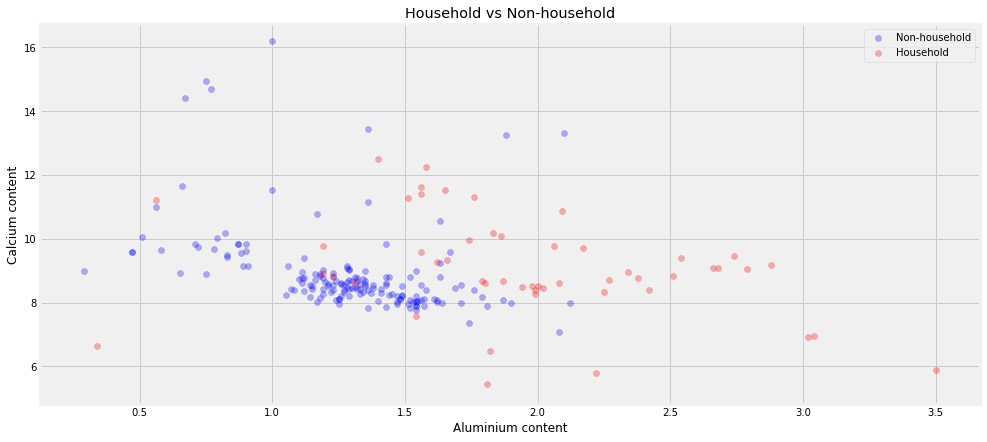

In [7]:
# Tend to have higher levels of aluminium and calcium in household glass
non_house = glass[glass.household == 0]
house = glass[glass.household == 1]

plt.figure(figsize=(15, 7))
plt.title("Household vs Non-household")
plt.xlabel("Aluminium content")
plt.ylabel("Calcium content")
plt.scatter(non_house.al, non_house.ca, color="blue", label="Non-household", alpha = 0.3)
plt.scatter(house.al, house.ca, color="red", label="Household", alpha = 0.3)
plt.legend()
plt.show();

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [10]:
# Instantiate model
logreg = LogisticRegression()

# Define the choices for Grid Search
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [11]:
# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [12]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.925000 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [13]:
# Full view of results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.920833 (0.060237) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.920833 (0.060237) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.920833 (0.060237) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.918750 (0.060703) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.918750 (0.060703) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.918750 (0.060703) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.922917 (0.063908) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.922917 (0.063908) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.925000 (0.059073) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.900000 (0.067700) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.900000 (0.067700) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.904167 (0.064010) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.847917 (0.065914) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847917 (0.06591

In [13]:
# solver='liblinear', penalty='l2', C=1.0

In [14]:
model = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)

In [15]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [16]:
y_pred = model.predict(X_test)

In [17]:
# Approx 94% accurate
model.score(X_test, y_test)

0.9444444444444444

In [18]:
print(model.coef_)
print(model.intercept_)

[[-2.03224121  1.53103022  0.12127344 -0.84698893]]
[-0.0048319]


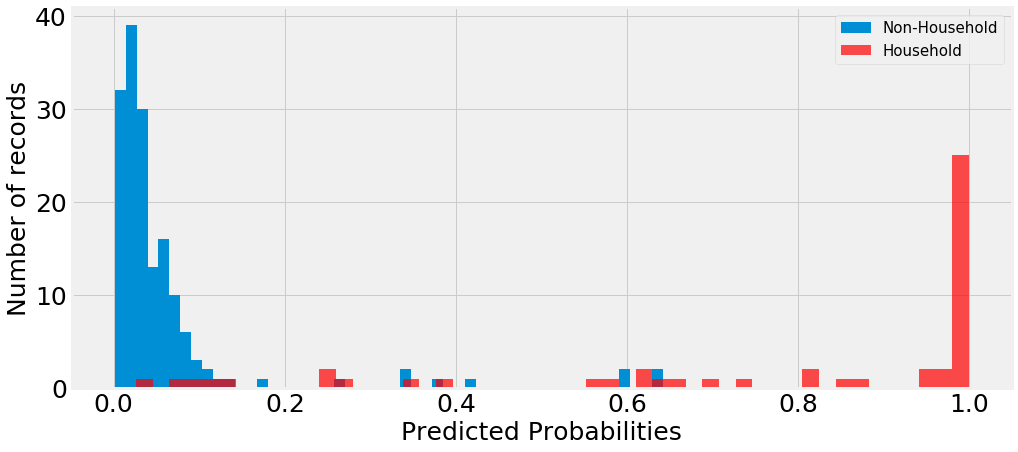

In [19]:
# Plot predicted probability distribution - lower occurrence of probabilities for household glass

pred_probs = model.predict_proba(X)[:, 1]

plt.figure(figsize=(15, 7))
plt.hist(pred_probs[y==0], bins=50, label='Non-Household')
plt.hist(pred_probs[y==1], bins=50, label='Household', alpha=0.7, color='r')
plt.xlabel('Predicted Probabilities', fontsize=25)
plt.ylabel('Number of records', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show()

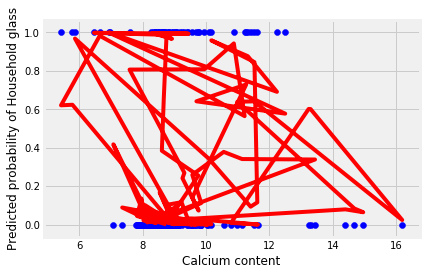

In [20]:
# Plot predicted probabilities of household against calcium content, yikes!

plt.scatter(X.ca, y, color='blue');
plt.plot(X.ca, pred_probs, color='red');
plt.xlabel('Calcium content');
plt.ylabel('Predicted probability of Household glass');

In [25]:
X_test.head()

,mg,al,si,ca
66,3.65,0.87,72.22,9.85
78,3.52,1.25,72.88,7.94
39,3.82,0.47,71.77,9.57
168,0.00,1.83,73.88,10.17
196,0.00,2.54,73.23,9.41


In [21]:
# Plotting the decision boundary from Logistic Regression model
import matplotlib as mpl

In [22]:
def plot_decision_boundary(X, y, model):
    cMap = mpl.colors.ListedColormap(["#6b76e8", "#c775d1"])
    cMapa = mpl.colors.ListedColormap(["#c775d1", "#6b76e8"])
    
    # THIS IS WRONG! Find the min and max x and y coordinates for our data
    x_min, x_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
    y_min, y_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
    h = .02  # step size in the mesh
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.column_stack((xx.ravel(), yy.ravel())))
    Z = Z.reshape(xx.shape)
    
    plt.figure(1, figsize=(8, 6), frameon=True)
    plt.axis('off')
    plt.pcolormesh(xx, yy, Z, cmap=cMap)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker = "o", edgecolors='k', cmap=cMapa)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show();

In [26]:
#plot_decision_boundary(X_test, y_test, model)

In [ ]:
# The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values.

In [27]:
import numpy as np
print(np.__version__)

1.21.5
